# ML1 Linear Regression Case Study 1 Tips data

Linear regression is a very simple supervised machine learning algorithm – we have data (X , Y) with linear relationship. we want to predict unknown Y vales for given X. X can be one or more parameters.

### Step 1: Importing Libraries and dataset

In [1]:
# Libraries for mathematical calculations
import numpy as np
import pandas as pd

# Libraries for plots
import matplotlib.pyplot as plt
import seaborn as sb

### Multiple Linear Regression Case : Tips Data

In [2]:
sb.get_dataset_names()

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file d:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [3]:
df = sb.load_dataset("tips")

In [4]:
#df

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The dataset contains tips data from different customers females and males smokers and non smokers from days Thursday to Sunday, dinner or lunch and from different tables size

We want to predict how much tip the waiter will earn based on other parameters

### Step 2: Explore the data

In [7]:
print(df.head())
print(df.tail())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [8]:
df.shape

(244, 7)

In [9]:
for item in range(df.shape[1]):
    print ("column number :", item)    

column number : 0
column number : 1
column number : 2
column number : 3
column number : 4
column number : 5
column number : 6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [11]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
df.sample()
#randomsample = df.sample(10)
#randomsample

,total_bill,tip,sex,smoker,day,time,size
213,13.27,2.5,Female,Yes,Sat,Dinner,2


In [13]:
df.iloc[5:10,0:4]

,total_bill,tip,sex,smoker
5,25.29,4.71,Male,No
6,8.77,2.00,Male,No
7,26.88,3.12,Male,No
8,15.04,1.96,Male,No
9,14.78,3.23,Male,No


### Step 3: Analyze the data

What is the hardest day to work ? (based on number of tables been served)

In [14]:
#df.groupby('size').count()

In [15]:
print(df.groupby('day').count())

      total_bill  tip  sex  smoker  time  size
day                                           
Thur          62   62   62      62    62    62
Fri           19   19   19      19    19    19
Sat           87   87   87      87    87    87
Sun           76   76   76      76    76    76


What is the best day to work – maximum tips (sum and percents)

In [16]:
df2 = df.groupby('day').sum() # sum per day
df2

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [17]:
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df2

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


In [18]:
#df2['percent']

In [19]:
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percents
df2

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [20]:
print(df2)

      total_bill     tip    percent
day                                
Thur     1096.33  171.83  15.673201
Fri       325.88   51.96  15.944519
Sat      1778.40  260.40  14.642375
Sun      1627.16  247.39  15.203791


who eats more (and tips more)? smokers or non smokers?

In [21]:
df3=df.groupby('smoker').sum()
df3

,total_bill,tip,size
smoker,,,
Yes,1930.34,279.81,224
No,2897.43,451.77,403


In [22]:
df3['percent'] = df3['tip']/df3['total_bill']*100
df3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [23]:
df3=df.groupby('sex').sum()
df3

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [24]:
df3['percent'] = df3['tip']/df3['total_bill']*100
df3

,total_bill,tip,size,percent
sex,,,,
Male,3256.82,485.07,413,14.893976
Female,1570.95,246.51,214,15.691779


Analyze by day and table size:

In [25]:
df4= df.groupby(['day','size']).sum()
df4

total_bill     tip
day  size                    
Thur 1          10.07    1.83
     2         727.53  117.24
     3          76.64   10.77
     4         149.75   21.09
     5          41.19    5.00
     6          91.15   15.90
Fri  1           8.58    1.92
     2         261.15   42.31
     3          15.98    3.00
     4          40.17    4.73
     5            NaN     NaN
     6            NaN     NaN
Sat  1          10.32    2.00
     2         892.37  133.43
     3         459.17   68.36
     4         388.39   53.61
     5          28.15    3.00
     6            NaN     NaN
Sun  1            NaN     NaN
     2         684.84  109.86
     3         332.76   46.81
     4         480.39   73.58
     5          81.00   12.14
     6          48.17    5.00

In [26]:
df4['percent'] = df4['tip']/df4['total_bill']*100
df4

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
     5            NaN     NaN        NaN
     6            NaN     NaN        NaN
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
     6            NaN     NaN        NaN
Sun  1            NaN     NaN        NaN
     2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

In [27]:
df5 = df4.dropna(axis=0) # drop null rows

print(df5)

           total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905


### Step 4: Visualize the data and inter-relationships

Tables per day:

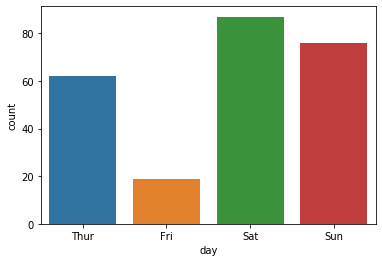

In [28]:
sb.countplot(x='day' ,data=df)

Tables per day per size:

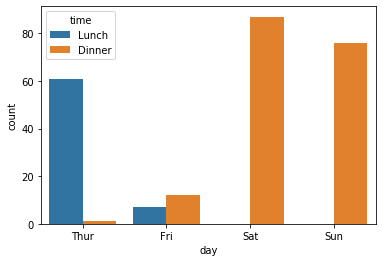

In [29]:
sb.countplot(x='day',hue='time' ,data=df)

Smokers or not ?:

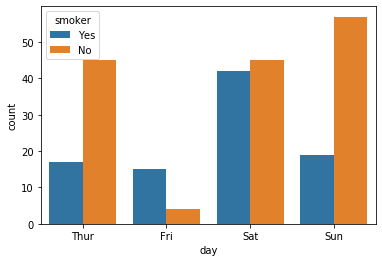

In [30]:
sb.countplot(x='day',hue='smoker' ,data=df)

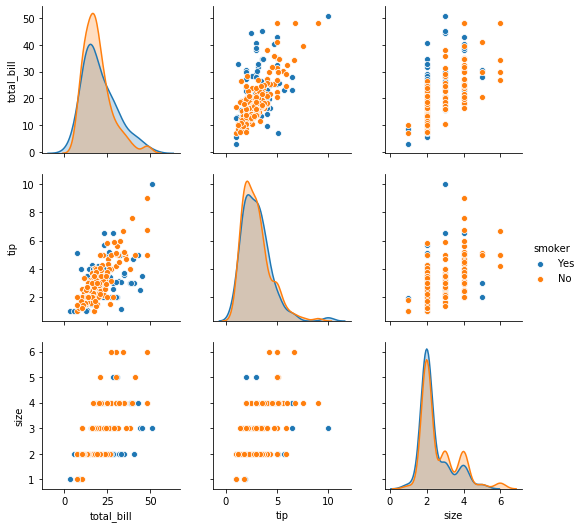

In [31]:
sb.pairplot(df, hue="smoker")

### Step 5: Transform and Clean the data

Before we start building our model, we need to convert all the text values into numbers. We can do it in many ways:

A. Using update statements.

B. Using replace method

C. Iterate over the rows

D. Use dummy variables

Using replace: 

convert sex and smoker columns to values

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
refdict = {'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}}


In [34]:
df.replace(refdict, inplace=True)

In [35]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


Using dummy variables:

The values in day column are:  Thu, Fri, Sat, Sun we can convert it to 1,2,3,4 but to get a good model, it is better to use boolean variables. We can achieve it by converting the column into 4 columns – one for each day with 0 or 1 as values. In pandas library it can be done using get_dummies:

In [36]:
days=pd.get_dummies(df['day'])
days.sample(5)

day,Thur,Fri,Sat,Sun
198,1,0,0,0
119,1,0,0,0
235,0,0,1,0
197,1,0,0,0
167,0,0,0,1


Actually we can drop one of the columns without loosing data – for example if we drop column ‘Thur’ we know that if all other days are 0 at an observation, then the right day is 'Thur'. It is also supported by the same function:

In [37]:
days=pd.get_dummies(df['day'],drop_first=True)
days.sample(5)

day,Fri,Sat,Sun
65,0,1,0
7,0,0,1
126,0,0,0
169,0,1,0
159,0,0,1


Do the same with time column and concat all data frames, Also we don’t need the day and size columns anymore so we drop them

In [38]:
# Dummification of Days
days=pd.get_dummies(df['day'],drop_first=True)
df = pd.concat([df,days],axis=1)
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun
234,15.53,3.00,0,1,Sat,Dinner,2,0,1,0
235,10.07,1.25,0,0,Sat,Dinner,2,0,1,0
236,12.60,1.00,0,1,Sat,Dinner,2,0,1,0
237,32.83,1.17,0,1,Sat,Dinner,2,0,1,0
238,35.83,4.67,1,0,Sat,Dinner,3,0,1,0
239,29.03,5.92,0,0,Sat,Dinner,3,0,1,0
240,27.18,2.00,1,1,Sat,Dinner,2,0,1,0
241,22.67,2.00,0,1,Sat,Dinner,2,0,1,0
242,17.82,1.75,0,0,Sat,Dinner,2,0,1,0
243,18.78,3.00,1,0,Thur,Dinner,2,0,0,0


In [39]:
# Dummification of Meal Time
times=pd.get_dummies(df['time'],drop_first=True)
df = pd.concat([df,times],axis=1)
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Dinner
234,15.53,3.00,0,1,Sat,Dinner,2,0,1,0,1
235,10.07,1.25,0,0,Sat,Dinner,2,0,1,0,1
236,12.60,1.00,0,1,Sat,Dinner,2,0,1,0,1
237,32.83,1.17,0,1,Sat,Dinner,2,0,1,0,1
238,35.83,4.67,1,0,Sat,Dinner,3,0,1,0,1
239,29.03,5.92,0,0,Sat,Dinner,3,0,1,0,1
240,27.18,2.00,1,1,Sat,Dinner,2,0,1,0,1
241,22.67,2.00,0,1,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,0,0,Sat,Dinner,2,0,1,0,1
243,18.78,3.00,1,0,Thur,Dinner,2,0,0,0,1


In [40]:
# Dropping the unnecessary columns
df.drop(['day','time'],inplace=True,axis=1)
df.tail(10)

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Dinner
234,15.53,3.00,0,1,2,0,1,0,1
235,10.07,1.25,0,0,2,0,1,0,1
236,12.60,1.00,0,1,2,0,1,0,1
237,32.83,1.17,0,1,2,0,1,0,1
238,35.83,4.67,1,0,3,0,1,0,1
239,29.03,5.92,0,0,3,0,1,0,1
240,27.18,2.00,1,1,2,0,1,0,1
241,22.67,2.00,0,1,2,0,1,0,1
242,17.82,1.75,0,0,2,0,1,0,1
243,18.78,3.00,1,0,2,0,0,0,1


### Step 6: Building Machine Learning model, based on Linear Regression Algorithm

We create a list of features as X and predicted as Y

In [41]:
X = df[['total_bill','sex','smoker','size','Fri','Sat','Sun','Dinner']]
y = df[['tip']]

In [42]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [43]:
# Libraries for ML modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Split the data into test and train so we can test our model before we use it – we decide to split 70% – 30%:

In [44]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=3,random_state=26)

 Train the model with X_train and y_train:

In [45]:
# Create untrained model
lr_mod = LinearRegression()
type(lr_mod)

sklearn.linear_model._base.LinearRegression

In [46]:
# Training the model
lr_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the X_test values:

In [47]:
predictions=lr_mod.predict(X_test)
#print([predictions,list(y_test)])
#print(list(predictions),list(y_test))

In [49]:
predictions

array([[1.88287479],
       [1.56902011],
       [2.25655354]])

In [48]:
y_test

,tip
135,1.25
111,1.00
124,2.52


### Step 7: Evaluate the Model Training results with test set

In [56]:
myvals = np.array([20, 0,0,8,0,0,1,0]).reshape(1,-1)
myvals

array([[20,  0,  0,  8,  0,  0,  1,  0]])

'total_bill','sex','smoker','size','Fri','Sat','Sun','Dinner'

In [57]:
lr_mod.predict(myvals)

array([[4.09572232]])